<a href="https://colab.research.google.com/github/eshu077/Complete_Machine_Learning/blob/main/ML_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Logistic Regression Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
data = pd.read_csv('cleaned_titanic_data.csv')
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [ ]:
data.shape


(891, 7)

**Imbalance Data**

In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
round(549/891*100, 2)

61.62

In [ ]:
round(342/891*100, 2)

38.38

**Separate independent and Dependent Data**

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [ ]:
  X = data.drop(columns=['Survived'], axis=1)
  y = data['Survived']

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


**Split data into train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((712, 6), (179, 6))

**Model Training**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(lr.class_weight)

None


In [ ]:
lr.coef_

array([[-0.92781275, -0.03200603, -0.31757711, -0.12932822,  0.00342225,
        -2.61132028]])

**Model Prediction**

In [ ]:
lr

LogisticRegression()

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.5,0,0,28.500,1
733,2,23.0,0,0,13.000,1
382,3,32.0,0,0,7.925,1


In [ ]:
y_train[:3]

,Survived
331,0
733,0
382,0


In [ ]:
y_pred_train[:3]

array([0, 0, 0])

In [ ]:
X_test[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
709,3,29.699118,1,1,15.2458,1
439,2,31.000000,0,0,10.5000,1
840,3,20.000000,0,0,7.9250,1


In [ ]:
y_test[:3]

,Survived
709,1
439,0
840,0


In [ ]:
y_pred_test[:3]

array([0, 0, 0])

**Model Evaluation**

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[389,  55],
       [ 87, 181]])

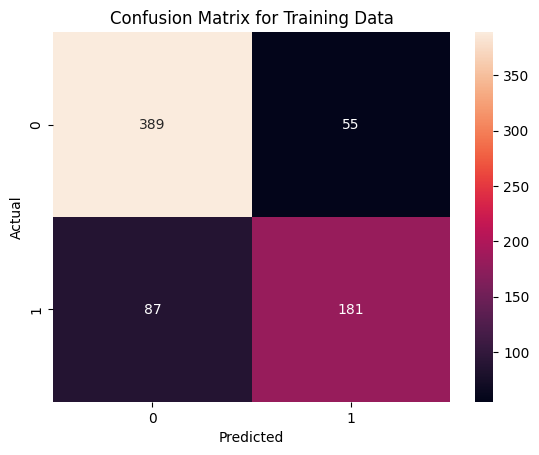

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.3g')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy_score(y_train, y_pred_train)

0.800561797752809

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       444
           1       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
# Test Evaluation

confusion_matrix(y_test, y_pred_test)

array([[92, 13],
       [21, 53]])

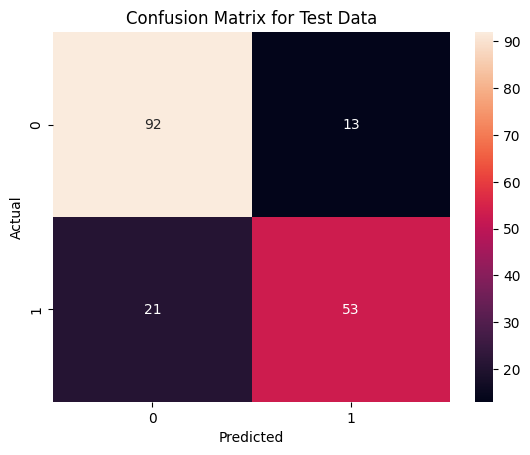

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.3g')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8100558659217877

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**SVM (Support Vector Machine) Regression**

In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv('cleaned_titanic_data.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [ ]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [ ]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.500000,0,0,28.5000,1
733,2,23.000000,0,0,13.0000,1
382,3,32.000000,0,0,7.9250,1
704,3,26.000000,1,0,7.8542,1
813,3,6.000000,4,2,31.2750,0
...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,0
270,1,29.699118,0,0,31.0000,1
860,3,41.000000,2,0,14.1083,1
435,1,14.000000,1,2,120.0000,0


In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
709,3,29.699118,1,1,15.2458,1
439,2,31.000000,0,0,10.5000,1
840,3,20.000000,0,0,7.9250,1
720,2,6.000000,0,1,33.0000,0
39,3,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,1
773,3,29.699118,0,0,7.2250,1
25,3,38.000000,1,5,31.3875,0
84,2,17.000000,0,0,10.5000,0


**Model Building (SVM)**

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.5,0,0,28.500,1
733,2,23.0,0,0,13.000,1
382,3,32.0,0,0,7.925,1


In [ ]:
y_train[:3]

,Survived
331,0
733,0
382,0


In [ ]:
y_pred_train[:3]

array([0, 0, 0])

**Model Evaluation**

In [ ]:
# Training

confusion_matrix(y_train, y_pred_train)

array([[380,  64],
       [ 87, 181]])

In [ ]:
accuracy_score(y_train, y_pred_train)

0.7879213483146067

In [ ]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [ ]:
# Test

confusion_matrix(y_test, y_pred_test)

array([[88, 17],
       [22, 52]])

In [ ]:
accuracy_score(y_test, y_pred_test)

0.7821229050279329

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



**KNN Alogorithm**

In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv('cleaned_titanic_data.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [ ]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [ ]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.500000,0,0,28.5000,1
733,2,23.000000,0,0,13.0000,1
382,3,32.000000,0,0,7.9250,1
704,3,26.000000,1,0,7.8542,1
813,3,6.000000,4,2,31.2750,0
...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,0
270,1,29.699118,0,0,31.0000,1
860,3,41.000000,2,0,14.1083,1
435,1,14.000000,1,2,120.0000,0


In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
709,3,29.699118,1,1,15.2458,1
439,2,31.000000,0,0,10.5000,1
840,3,20.000000,0,0,7.9250,1
720,2,6.000000,0,1,33.0000,0
39,3,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,1
773,3,29.699118,0,0,7.2250,1
25,3,38.000000,1,5,31.3875,0
84,2,17.000000,0,0,10.5000,0


In [ ]:
# Model Building (KNN)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.5,0,0,28.500,1
733,2,23.0,0,0,13.000,1
382,3,32.0,0,0,7.925,1


In [ ]:
y_train[:3]

,Survived
331,0
733,0
382,0


In [ ]:
y_pred_train[:3]

array([0, 0, 0])

In [ ]:
# Model Evaluation

In [ ]:
# Training

confusion_matrix(y_train, y_pred_train)

array([[387,  57],
       [ 88, 180]])

In [ ]:
accuracy_score(y_train, y_pred_train)

0.7963483146067416

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       444
           1       0.76      0.67      0.71       268

    accuracy                           0.80       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.79      0.80      0.79       712



In [ ]:
# Test

confusion_matrix(y_test, y_pred_test)

array([[84, 21],
       [34, 40]])

In [ ]:
accuracy_score(y_test, y_pred_test)

0.6927374301675978

In [ ]:
print(classification_report(y_test, y_pred_test))

**Decision Tree Post Pruning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
df['species'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['species']
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
# Model Building

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


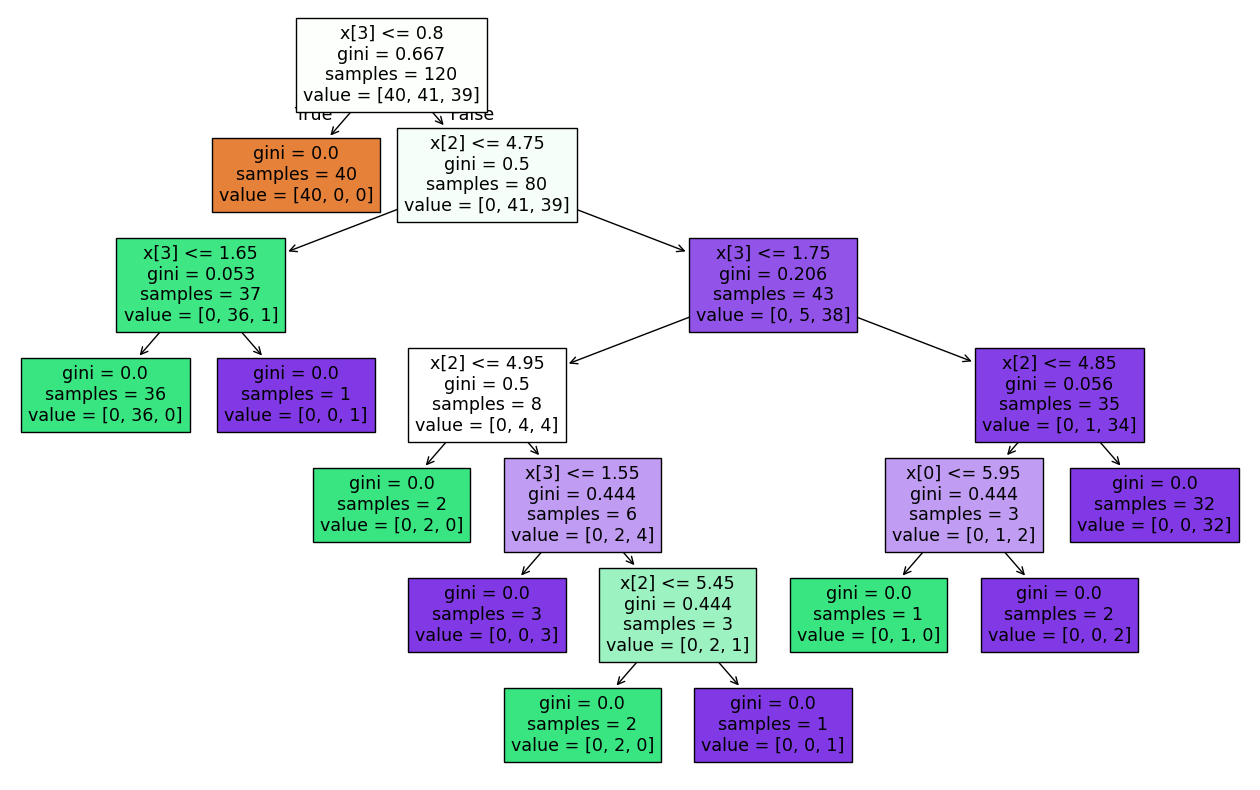

In [ ]:
from sklearn import tree

plt.figure(figsize=(16, 10))
tree.plot_tree(dtree, filled=True)
plt.show()

In [ ]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 39]])

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
# Test

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
accuracy_score(y_test, y_test_pred)

1.0

In [ ]:
# NOW START POST PRUNING

In [ ]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

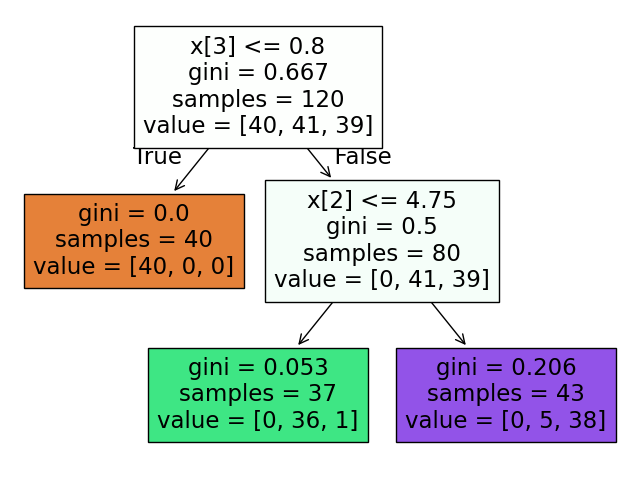

In [ ]:
plt.figure(figsize=(8,6))
tree.plot_tree(dtree, filled=True)
plt.show()

In [ ]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 36,  5],
       [ 0,  1, 38]])

In [ ]:
accuracy_score(y_train, y_train_pred)

0.95

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        41
           2       0.88      0.97      0.93        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
# test

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [ ]:
accuracy_score(y_test, y_test_pred)

0.9666666666666667

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



**Decision Tree Pre Pruning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df['species'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['species']
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
# Pre - Pruning

In [ ]:
parameters = {

            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'max_depth': [1,2,3,4,5],
            'max_features': ['auto', 'sqrt', 'log2']

             }

parameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dtree, param_grid=parameters, cv=5, scoring='accuracy', verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 40,  1],
       [ 0,  5, 34]])

In [ ]:
accuracy_score(y_train, y_train_pred)

0.95

In [ ]:
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.89      0.98      0.93        41
           2       0.97      0.87      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
# Test

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
accuracy_score(y_test, y_test_pred)

1.0

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Random Forest Bagging Technique**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X = df.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y = df['target']
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [ ]:
# Using SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, svc_pred_train))
print()
print(accuracy_score(y_train, svc_pred_train))

[[ 45  64]
 [ 19 114]]

0.6570247933884298


In [ ]:
print(confusion_matrix(y_test, svc_pred_test))
print()
print(accuracy_score(y_test, svc_pred_test))

[[15 14]
 [ 4 28]]

0.7049180327868853


**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, lr_pred_train))
print()
print(accuracy_score(y_train, lr_pred_train))

[[ 86  23]
 [ 12 121]]

0.8553719008264463


In [ ]:
print(confusion_matrix(y_test, lr_pred_test))
print()
print(accuracy_score(y_test, lr_pred_test))

[[25  4]
 [ 3 29]]

0.8852459016393442


In [ ]:
# Using Random Forest

**Random Forest Using Hyperparameters**

In [ ]:
# params = {

#     'n_estimators': [100, 200, 300, 500, 1000]
#     'criterian': ['entropy', 'gini'],
#     'max_depth': [1,2,3,4,5,6,7],
#     'min_sample_split': [2,3,4,5]

# }

In [ ]:
rf = RandomForestClassifier(max_samples=0.75, random_state=42)
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, rf_pred_train))
print()
print(accuracy_score(y_train, rf_pred_train))

[[109   0]
 [  0 133]]

1.0


In [ ]:
print(confusion_matrix(y_test, rf_pred_test))
print()
print(accuracy_score(y_test, rf_pred_test))

[[26  3]
 [ 3 29]]

0.9016393442622951


**OOB SCORE**

In [ ]:
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [ ]:
rf.oob_score_

0.8347107438016529

In [ ]:
y_pred_test = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8360655737704918

**Adaboost Algorithm**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv('cleaned_titanic_data.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [ ]:
X = df.iloc[:, 1:]
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [ ]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender
331,1,45.500000,0,0,28.5000,1
733,2,23.000000,0,0,13.0000,1
382,3,32.000000,0,0,7.9250,1
704,3,26.000000,1,0,7.8542,1
813,3,6.000000,4,2,31.2750,0
...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,0
270,1,29.699118,0,0,31.0000,1
860,3,41.000000,2,0,14.1083,1
435,1,14.000000,1,2,120.0000,0


In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
709,3,29.699118,1,1,15.2458,1
439,2,31.000000,0,0,10.5000,1
840,3,20.000000,0,0,7.9250,1
720,2,6.000000,0,1,33.0000,0
39,3,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,1
773,3,29.699118,0,0,7.2250,1
25,3,38.000000,1,5,31.3875,0
84,2,17.000000,0,0,10.5000,0


In [ ]:
# Model Building

In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
clf.score(X_train, y_train)

0.8174157303370787

In [ ]:
clf.score(X_test, y_test)

0.8044692737430168

In [ ]:
# Prediction

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [ ]:
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [ ]:
# train

In [ ]:
import seaborn as sns

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[394,  50],
       [ 80, 188]])

<Axes: >

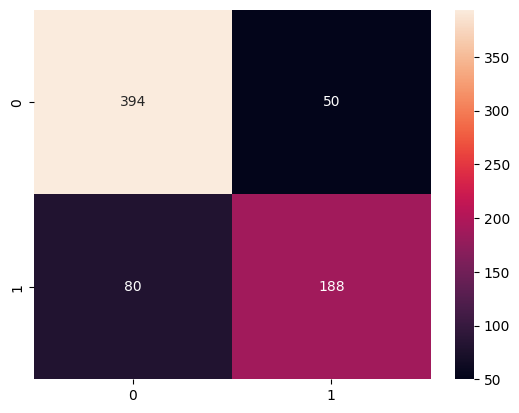

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='2')

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8174157303370787

In [ ]:
# test

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[91, 14],
       [21, 53]])

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8044692737430168

In [ ]:
# Model Building using Hyperparameters

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
clf.score(X_train, y_train)

0.8216292134831461

In [ ]:
clf.score(X_test, y_test)

0.8156424581005587

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=42, estimator=RandomForestClassifier(criterion='entropy', random_state=42))
clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [ ]:
clf.score(X_train, y_train)

0.9803370786516854

In [ ]:
clf.score(X_test, y_test)

0.8100558659217877